# EARTHQUAKE DAMAGE PREDICTION REPORT

To predict the level of damage (Grade Level- 1, 2, 3) to buildings caused by the 2015 Gorkha earthquake in Nepal. This is a multiclass classification task.

The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv("train_values.csv")
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [9]:
#Dataframe containing the target variable
data_y =  pd.read_csv("train_labels.csv")
data_y.drop("building_id", axis=1, inplace=True)
data_y.head()

,damage_grade
0,3
1,2
2,3
3,2
4,3


In [10]:
# Adding the target variable to the main dataframe
data["damage_grade"]=data_y["damage_grade"]
data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


In [11]:
data.describe() #For Numeric Data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
data.describe(include="O") #For Categorical Data

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,260601,260601,260601,260601,260601,260601,260601,260601
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,216757,219196,182842,209619,165282,202090,250072,250939


# Preliminary Data Analysis
There are 260601 observations and 39 features with 31 numerical and 8 categorical variables.

The building_id feature is a unique value column and must be dropped.

Despite the info() function showing no missing values, from the describe() function we can see that age has a minimum value of 0 (which is not possible) and thus indicative that there are some missing values.

The dataset has 12 binary features with 0 (no) or 1(yes) as the possible values. All the binary features except has_superstructure_mud_mortar_stone anre sparse columns with much more 0's than 1's since the mean is less than 0.10 for these features.

Age feature seems to have few outliers that are skewing the mean value.

The categorical columns have letters representing the different labels (obfuscated data)

Features like the geo level id are actually categorical varibles represented in a numeric form and need to undergo categorical encoding.

# Exploratory Data Analysis

Univariate Analysis

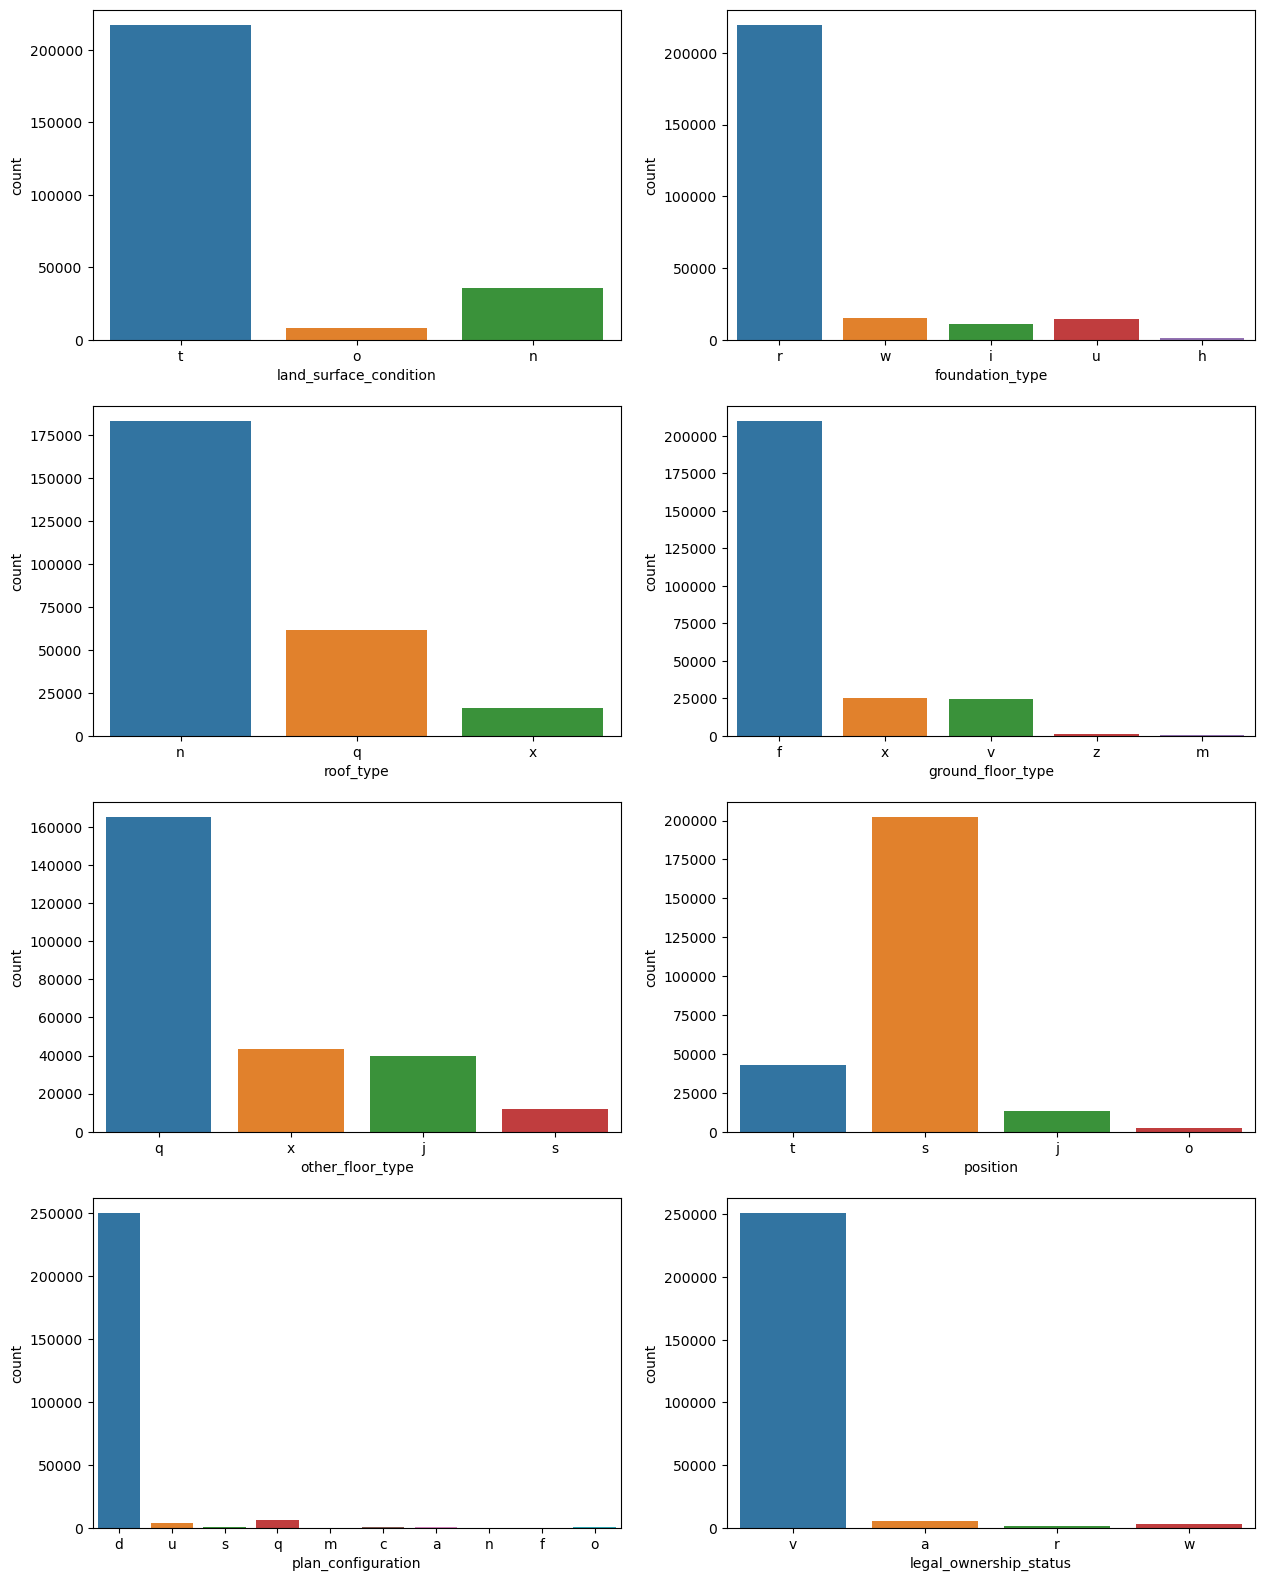

In [13]:
#Categorical Variables
plotnumber = 0
plt.figure(figsize=(15,30))
for column in data.columns:
    if data[column].dtype == "object":
        plotnumber+=1
        ax= plt.subplot(6,2,plotnumber)
        sns.countplot(data= data, x=column)
        

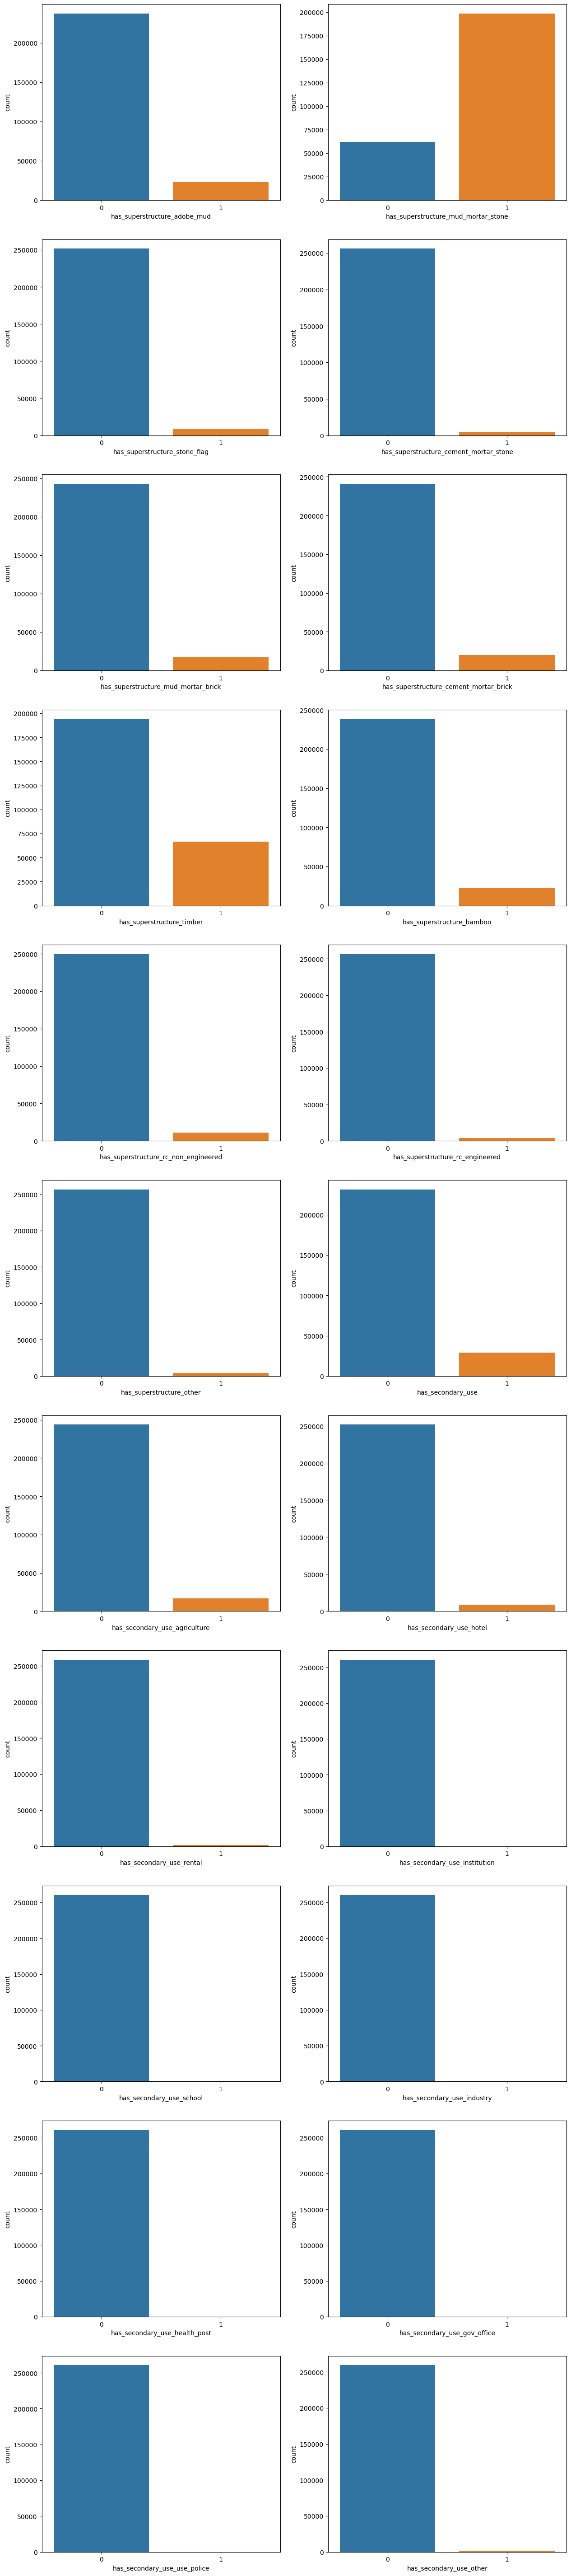

In [14]:
# Plotting Binary features

binary_features=['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other','has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

plotnumber = 0
plt.figure(figsize=(15,80))
for column in binary_features:
        plotnumber+=1
        ax= plt.subplot(12,2,plotnumber)
        sns.countplot(data= data, x=column)
        


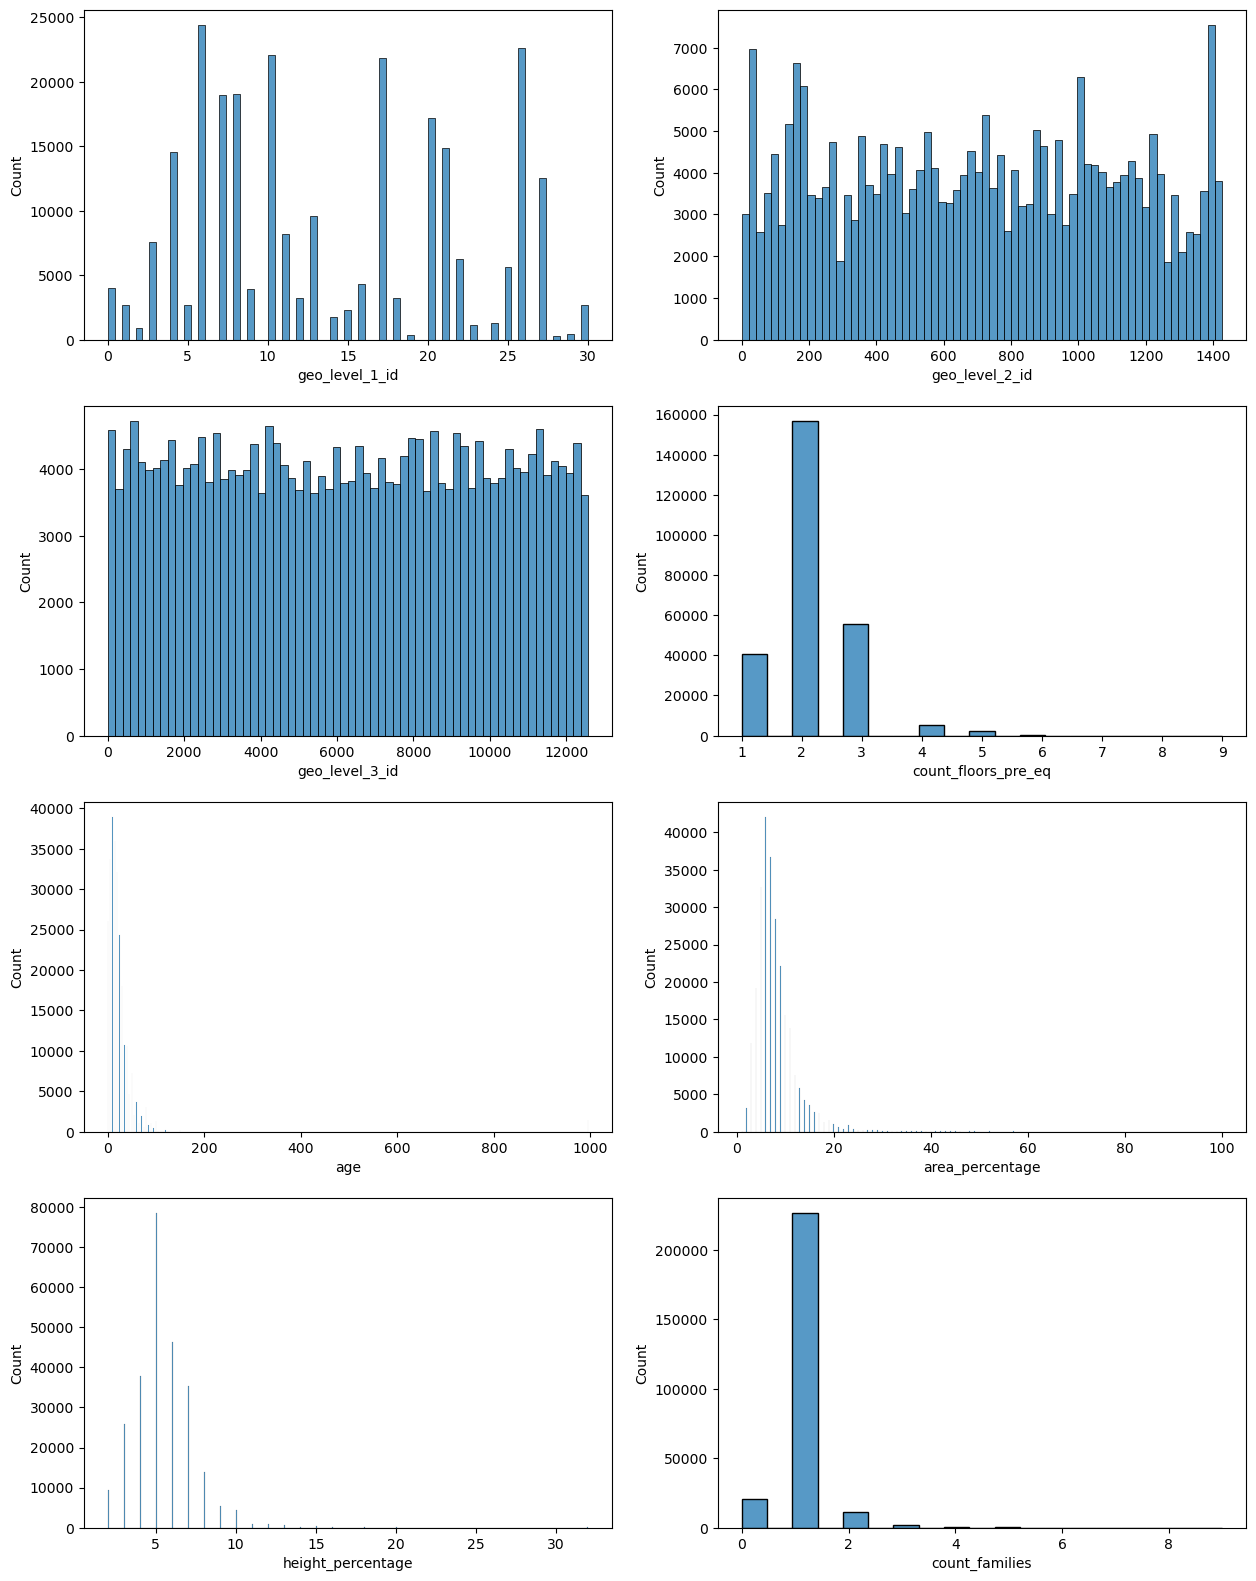

In [15]:
#Numerical Variables

numerical_features =['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage','count_families']
plotnumber = 0
plt.figure(figsize=(15,30))
for column in numerical_features:
        plotnumber+=1
        ax= plt.subplot(6,2,plotnumber)
        sns.histplot(data= data, x=column)

<Axes: xlabel='damage_grade', ylabel='count'>

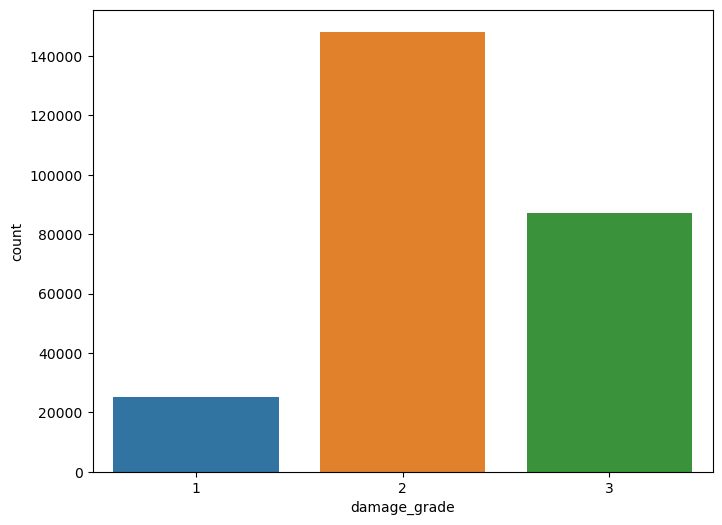

In [16]:
#Plotting Target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data_y, x ="damage_grade" )

# Damage Grade
57% of the observations have a damage grade=2, 33% have a damage_grade=3 and 10% have damage grade= 1. This is an ordinal feature with 1 implying low, 2 implying high and 3 being very high level of damage to buildings.

In [17]:
# import sweetviz as sv
# sv_report = sv.analyze(data)
# sv_report.show_html()

# Bivariate Analysis

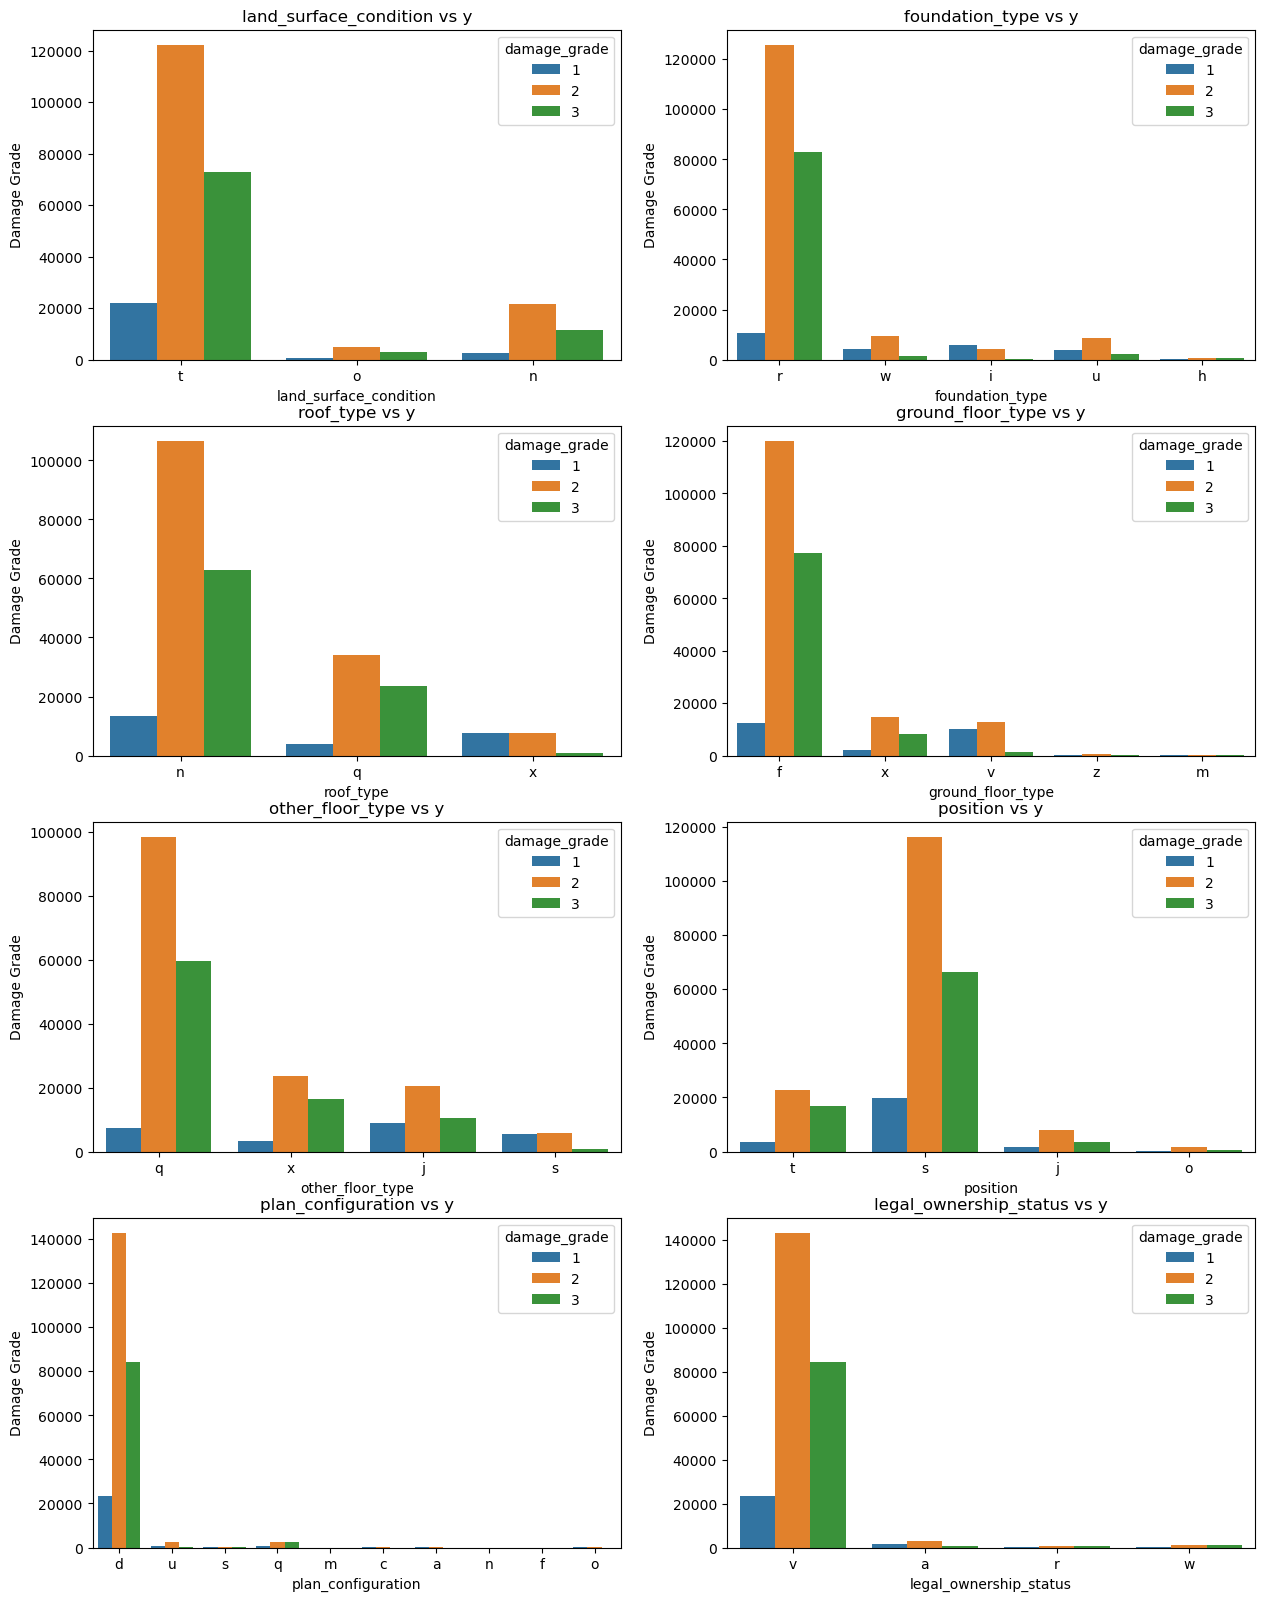

In [18]:
# Categorical data
plt.figure(figsize=(15,30))
plotnumber=0
for column in data.columns:
    if data[column].dtype=="object":
        plotnumber+=1
        ax= plt.subplot(6,2,plotnumber)
        sns.countplot(data=data,x=data[column], hue=data_y.damage_grade)
        plt.title(f"{column} vs y")
        plt.xlabel(f"{column}")
        plt.ylabel("Damage Grade")

# Categorical Features

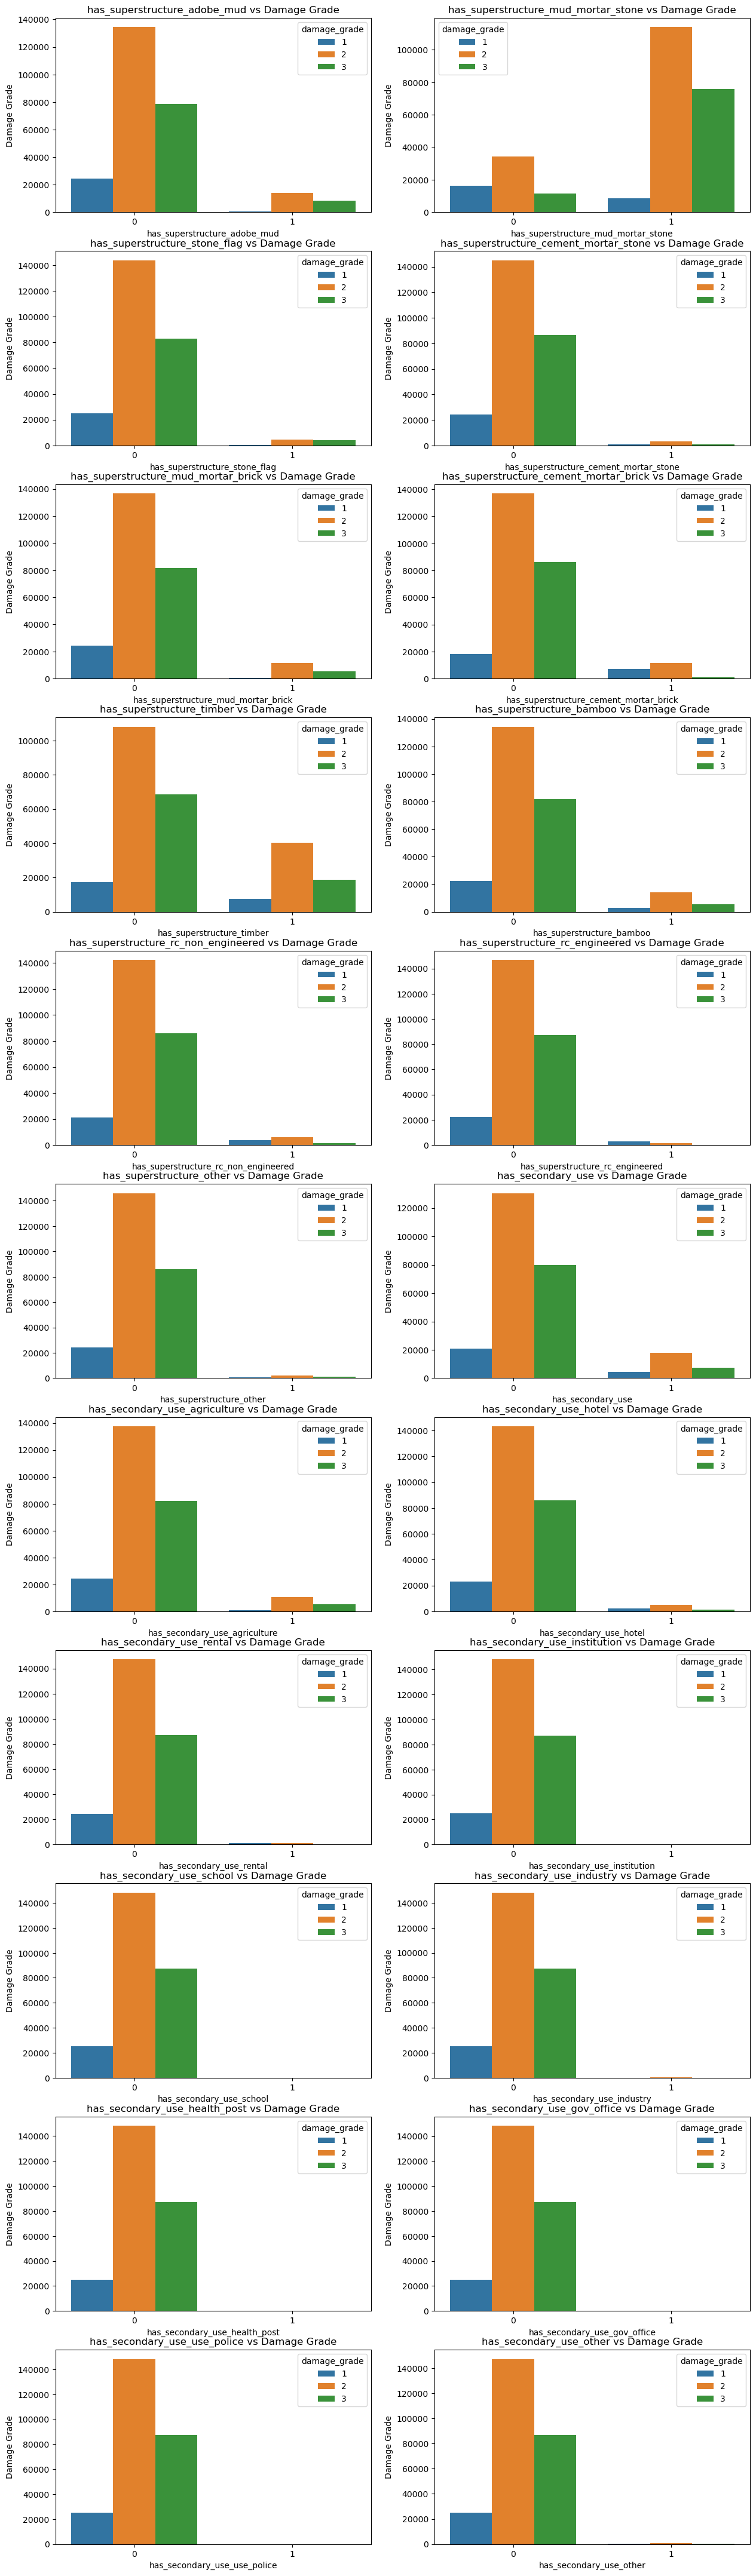

In [19]:
# Binary Features
plt.figure(figsize=(15,60))
plotnumber=0
for column in binary_features:
        plotnumber+=1
        ax= plt.subplot(12,2,plotnumber)
        sns.countplot(data=data,x=data[column], hue=data_y.damage_grade)
        plt.title(f"{column} vs Damage Grade")
        plt.xlabel(f"{column}")
        plt.ylabel("Damage Grade")

# Binary Features

has_superstructure_mud_mortar_stone vs Damage grade

Buildings that used mud mortar stone for construction showed proportionally higher damage grades (grade 2 or 3) as compared to those that did not use this material.

# All the other binary features vs y

In general, the other binary features are predimonantly sparse features with more 0's than 1's. A general observation for all these binary features is that for the 0 label , damage grade of level 2 occurs most frequently, followed by grade 3 and finally grade 1.

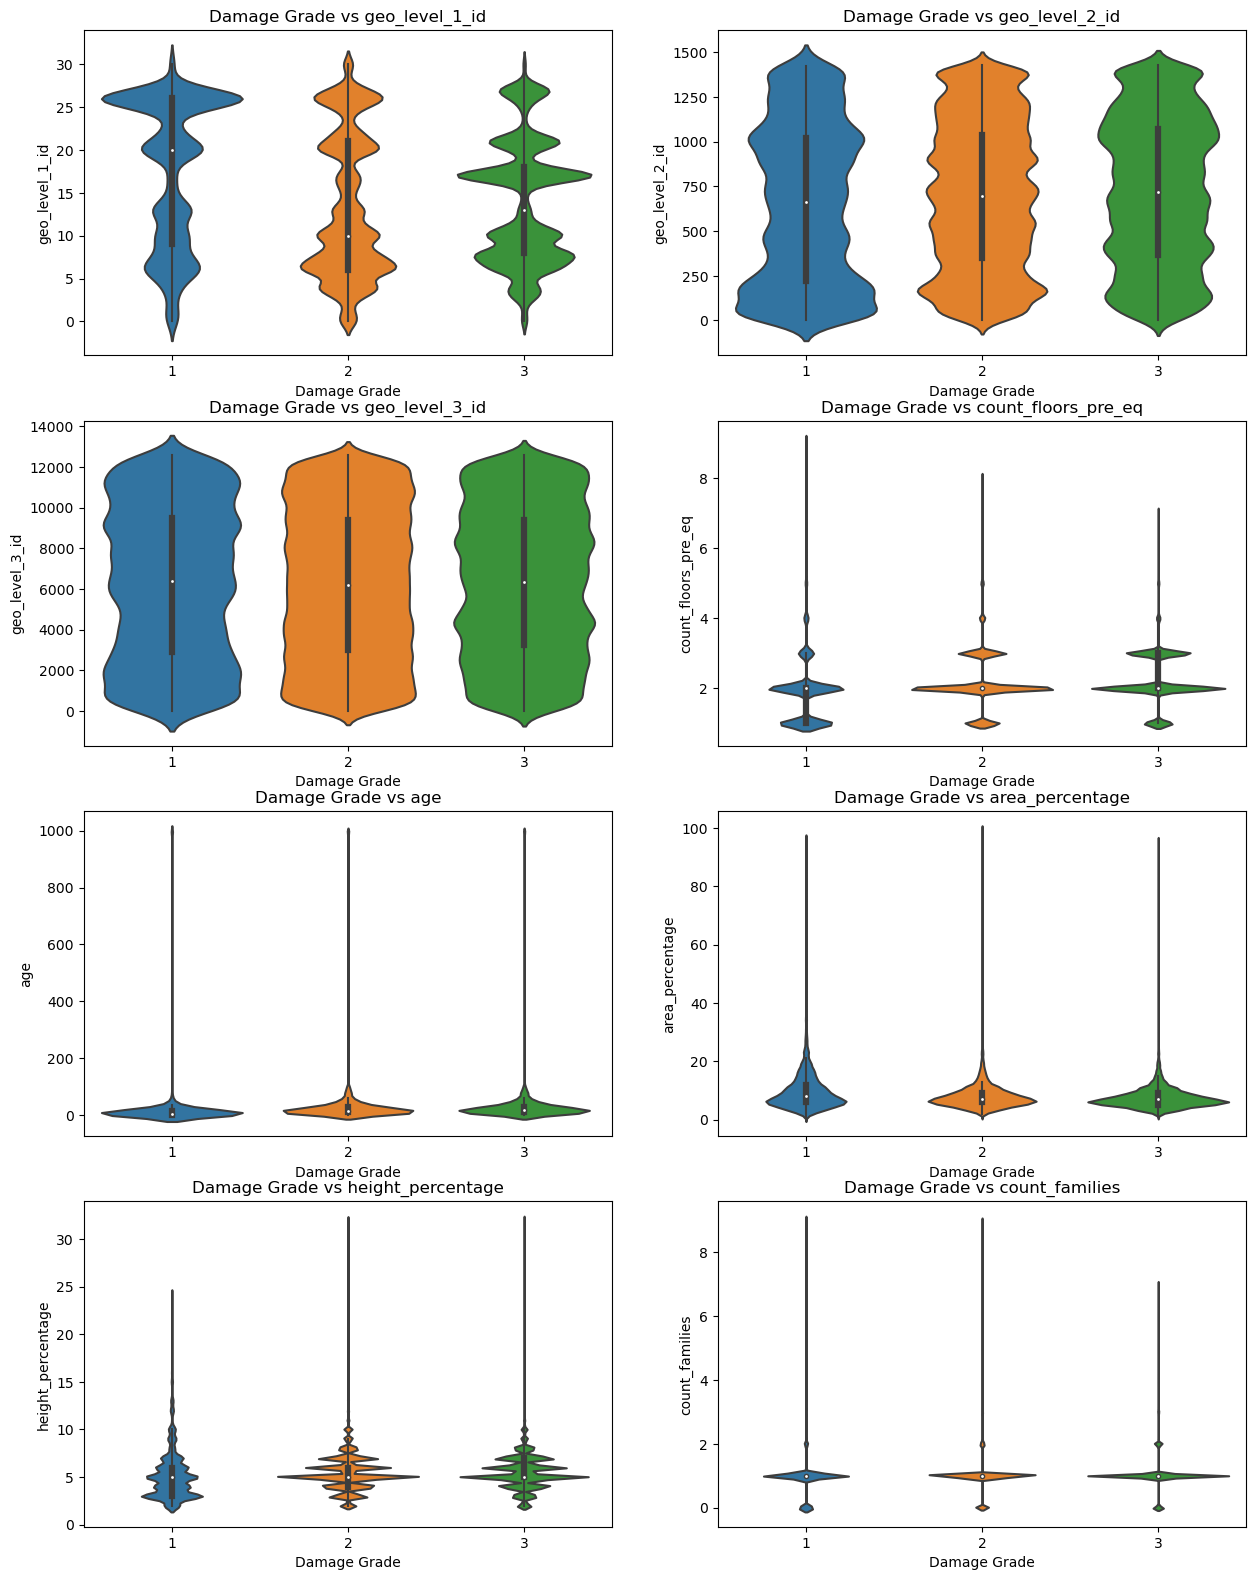

In [20]:
# Numerical Features
plt.figure(figsize=(15,60))
plotnumber=0
for column in numerical_features:
        plotnumber+=1
        ax= plt.subplot(12,2,plotnumber)
        sns.violinplot(data=data,y=data[column], x=data.damage_grade)
        plt.title(f"Damage Grade vs {column}")
        plt.ylabel(f"{column}")
        plt.xlabel("Damage Grade")

# Numerical Features

# Data Preprocessing

# Handling Missing Values

In [21]:
data.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

There are no missing values

# Feature Engineering

Certain numerical features have a positively skewed distribution as can be seen from the graphs below. This means that there are some observations with very high values as comapred to the rest of the data. This is problematic since such skewed data hurts the performance of nearly every prediction model, since it interferes with the loss function of the model.

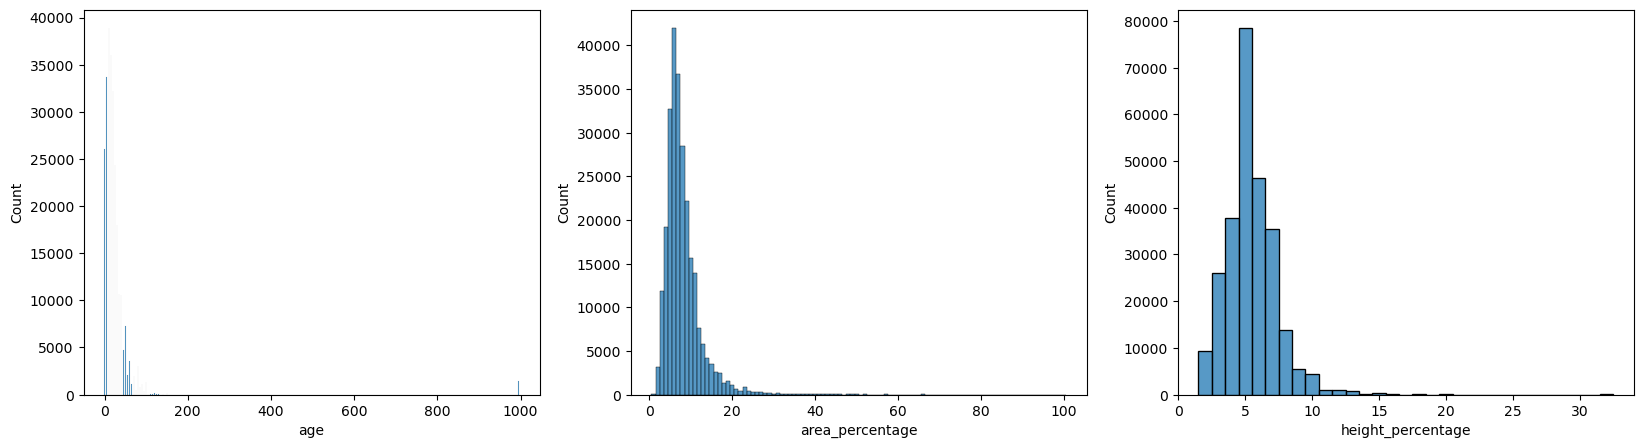

In [22]:
plotnumber=0
plt.figure(figsize=(20,5))
for feature in ["age","area_percentage", "height_percentage"]:
    plotnumber+=1
    ax=plt.subplot(1,3,plotnumber)
    sns.histplot(data[feature], discrete=True)

In order to tackle this excessive rightward skewness problem, we will take the log of the values of these features so that we can reduce this major disparity in observations without changing the order or meaning of the data.Since the age feature has 0 values and the natural log of 0 does nor exist, we will add 1 to each value and then take the log.

In [23]:
data.age = data.age.apply(lambda x: np.log(x+1))

In [24]:
data.area_percentage= np.log(data.area_percentage)
data.height_percentage= np.log(data.height_percentage)
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,3.433987,1.791759,1.609438,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,2.397895,2.079442,1.945910,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,2.397895,1.609438,1.609438,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,2.397895,1.791759,1.609438,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,3.433987,2.079442,2.197225,t,r,...,0,0,0,0,0,0,0,0,0,3


As we can see from the graphs below, after log transformation our graphs tend towards a normal distribution and the excessive rightward skew is reduced.

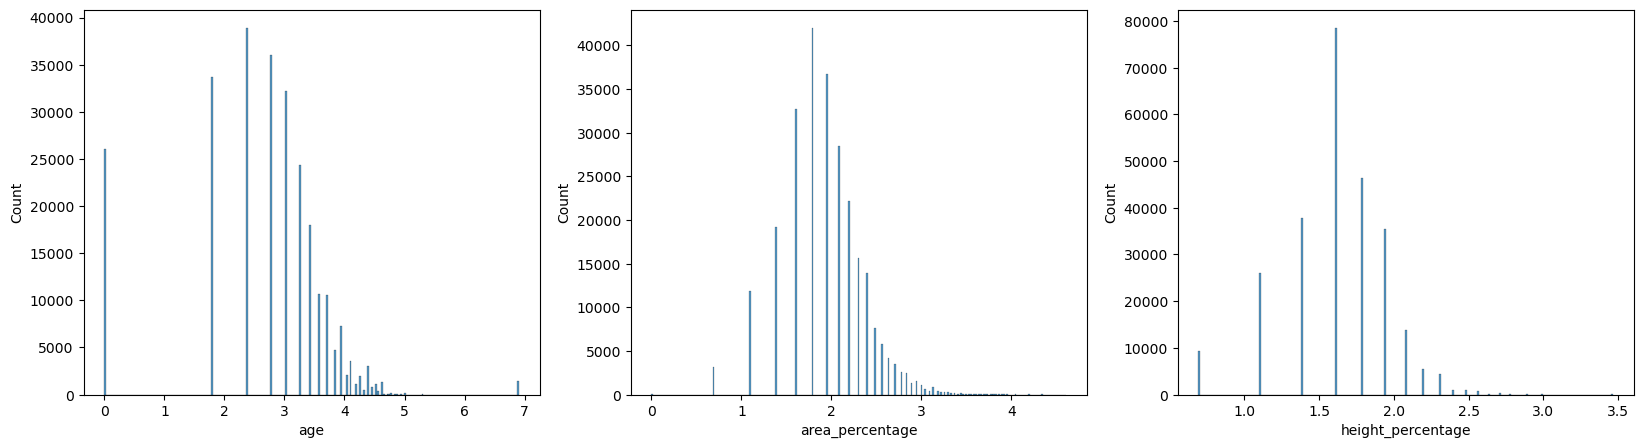

In [25]:
plotnumber=0
plt.figure(figsize=(20,5))
for feature in ["age","area_percentage", "height_percentage"]:
    plotnumber+=1
    ax=plt.subplot(1,3,plotnumber)
    sns.histplot(data[feature])

# Categorical Encoding

We will use One Hot Encoding for the categorical features.

In [26]:
data = pd.get_dummies(data, columns=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'], drop_first=True)
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,3.433987,1.791759,1.609438,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,2.397895,2.079442,1.945910,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,2.397895,1.609438,1.609438,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,2.397895,1.791759,1.609438,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,3.433987,2.079442,2.197225,1,0,...,0,0,0,0,0,0,0,0,1,0


Despite the 3 geo level id features being in a numeric form, they are actually categorical variables and have to be treated accordingly. The different values in these features are just numeric labels of locations with different specificity. The cardinality of features increase from geo level id 1 to 3 as the specifivity of the building's location increases. For such high cardinality features we will use target encoding which takes the mean of the response variable of each group and assigns all observations in that group that value.

# Feature Selection

<Axes: >

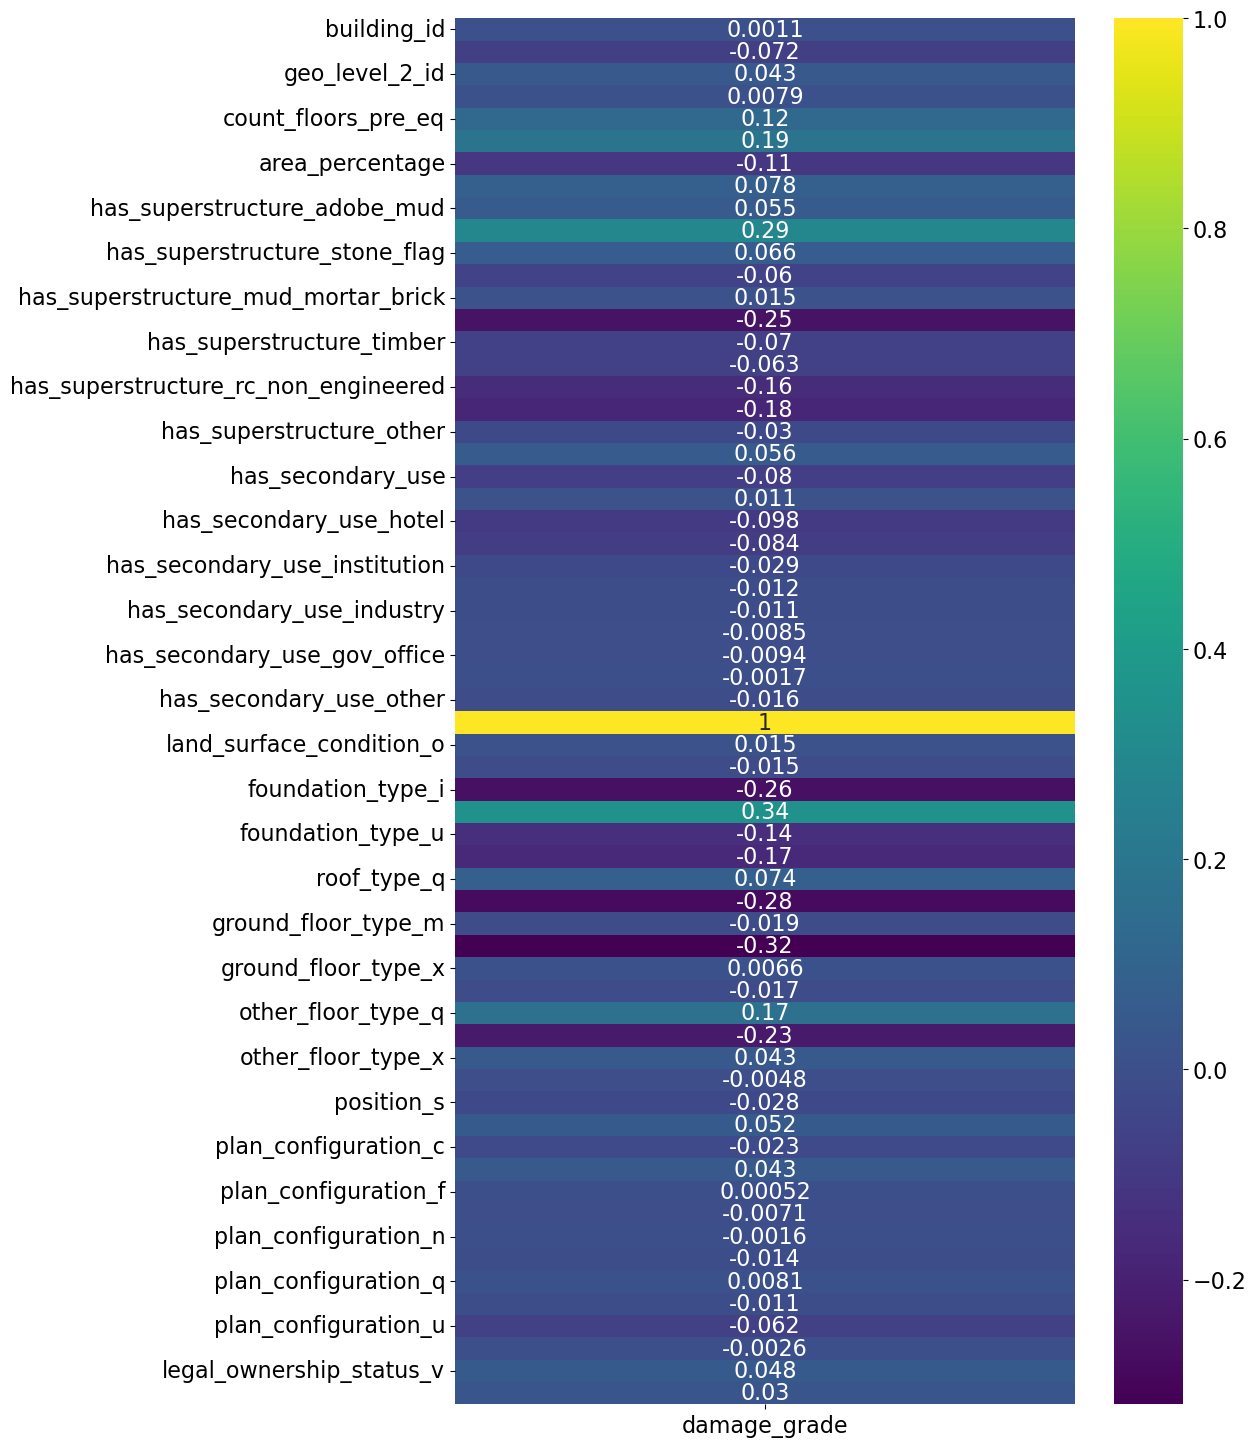

In [27]:
cor= data.corr()["damage_grade"]
plt.figure(figsize=(10,18))
cor=pd.DataFrame(cor)
plt.rcParams.update({'font.size': 16})
sns.heatmap(cor,annot=True,cmap="viridis")

The above plot consists of the correlation of each feature with the target variable. There are no highly correlated features.

In [28]:
#Droppping the building_id column since it is a unique value column and doesn't provide much information
data.drop("building_id", inplace=True, axis=1)

# Model Creation

# Splitting the dataset

In [29]:
from sklearn.model_selection import train_test_split

X= data.drop("damage_grade", axis=1)
y = data.damage_grade

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

# Model

In [30]:
from sklearn.ensemble import RandomForestClassifier

model_1 = RandomForestClassifier()
model_1.fit(X_train,y_train)
y_pred = model_1.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2979,  3232,   136],
       [ 1425, 30467,  5102],
       [  145,  8677, 12988]], dtype=int64)

We will take f1 score as our primary evaluation metric since both recall and precision is important in this use case. Since this is a multiclass classification problem we will use "micro" averaged f1 score which is the preferred metric when classes are imbalanced.

In [32]:
from sklearn.metrics import recall_score, precision_score,f1_score,roc_auc_score
print(f"The model's f1 score is {round(f1_score(y_test, y_pred,average='micro'),4)}")


The model's f1 score is 0.7127


In [33]:
print(f"The model's accuracy score is {round(accuracy_score(y_test, y_pred),4)}")

The model's accuracy score is 0.7127


In [34]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           1       0.65      0.47      0.55      6347
           2       0.72      0.82      0.77     36994
           3       0.71      0.60      0.65     21810

    accuracy                           0.71     65151
   macro avg       0.70      0.63      0.65     65151
weighted avg       0.71      0.71      0.71     65151



# The model's accuracy and f1 score is 0.71

The model performs best for class 2 followed by 3 and then 1. This difference in performance for each class can be explained by the disparity in number of observations in each class.

# Feature Importance

We willl conduct a feature importance test to see which features have a greater impact in predicting our target variable.

Text(0, 0.5, 'Features')

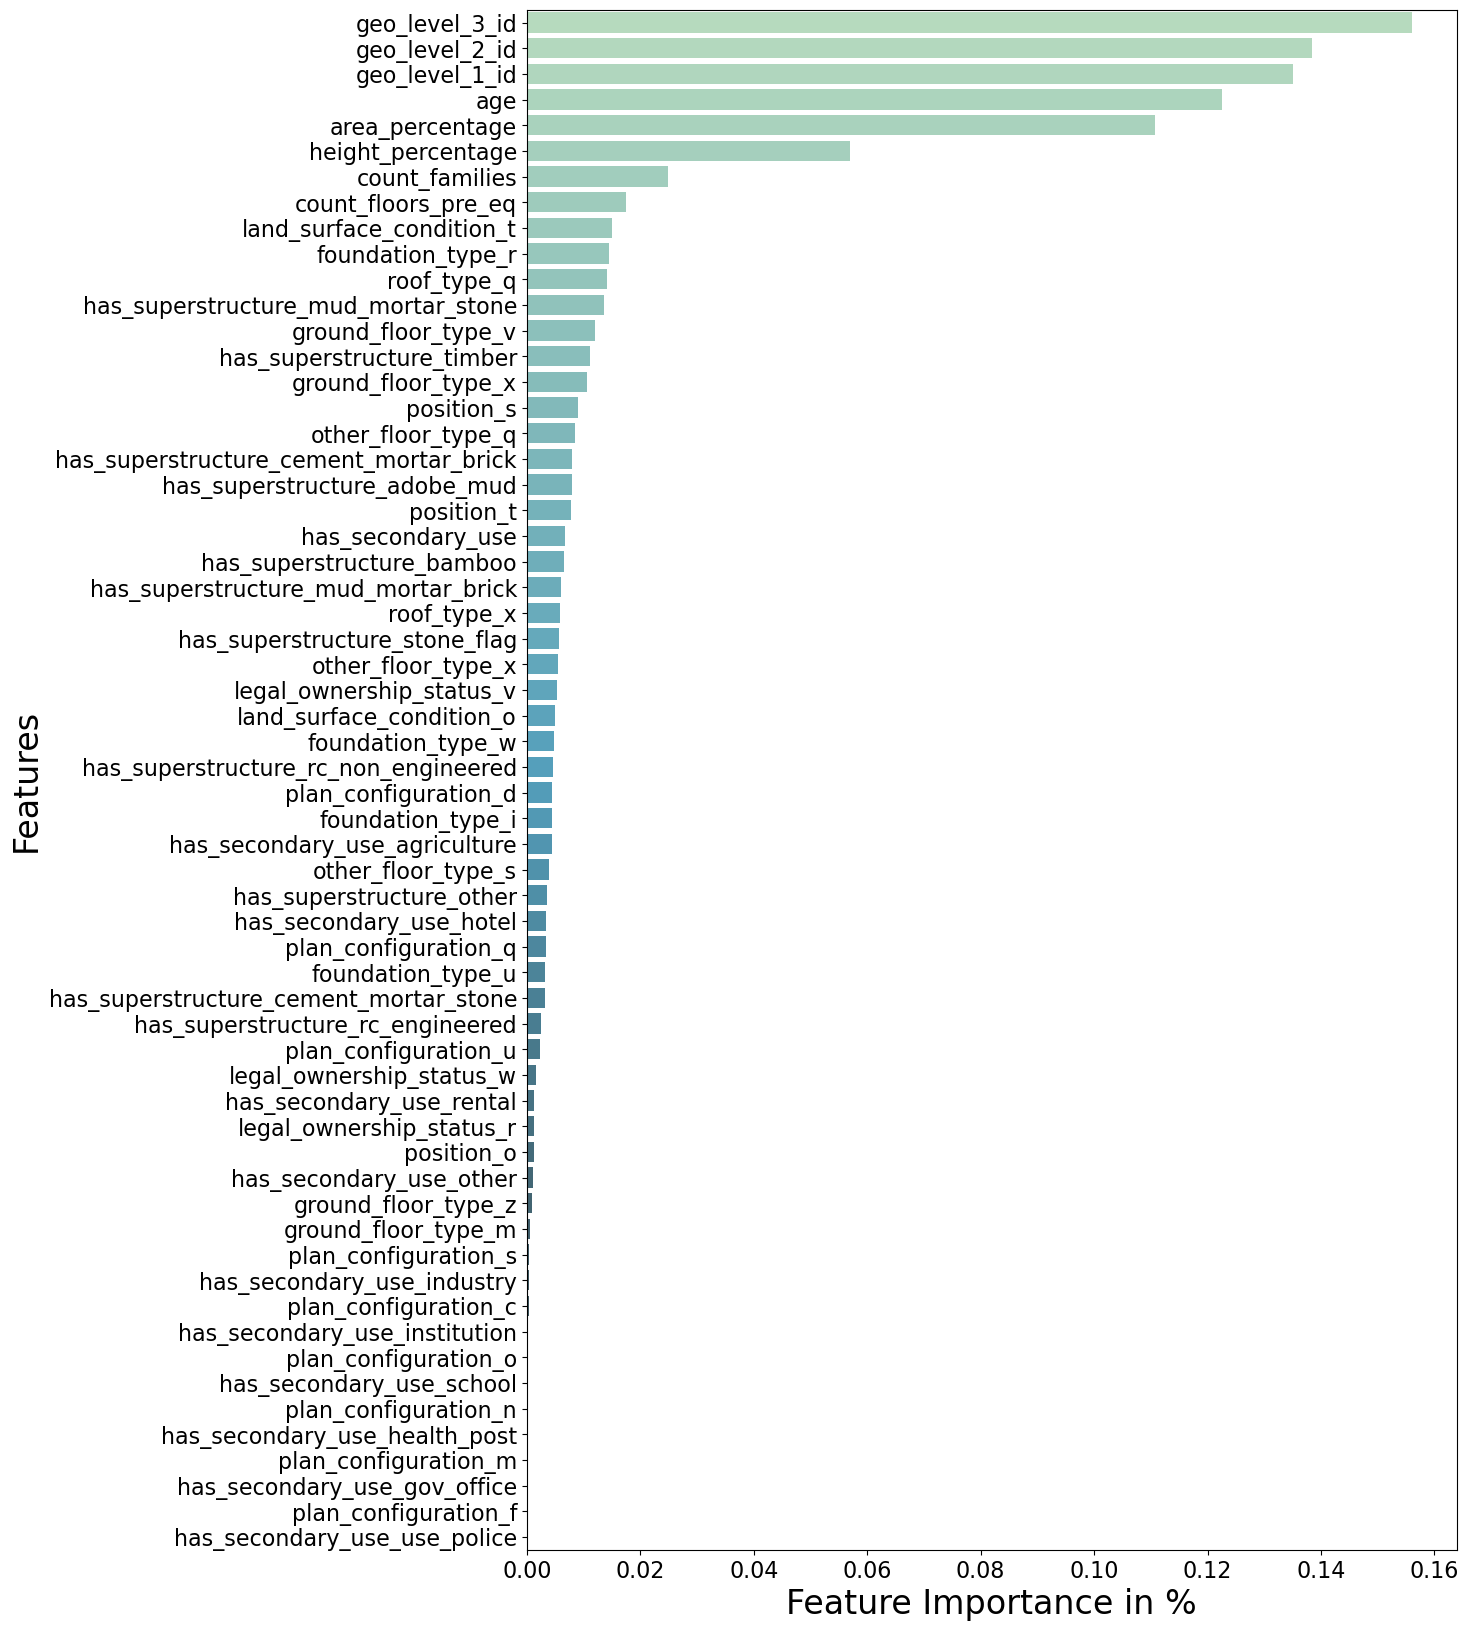

In [35]:
fimportance = model_1.feature_importances_
fimportance_df = pd.DataFrame() #creating feature importance dataframe
fimportance_df.loc[:, "f_imp"] = fimportance
fimportance_df.loc[:, "col"] = X.columns
fimportance_df.sort_values(by="f_imp", ascending=False, inplace=True) #Rearranging values in descending order
fig, ax = plt.subplots(1, 1, figsize=(12, 20))
ax = sns.barplot(x="f_imp", y="col",
                data=fimportance_df,
                palette="GnBu_d")
ax.tick_params(axis="both", which="major", labelsize=16)
ax.set_xlabel("Feature Importance in %", fontsize=24)
ax.set_ylabel("Features", fontsize=24)

It is evident that the geo level id features have the highest feature importance which is understandable since the location of the building (whether close to the earthquake's epicenter or far) would play a crucial role in predicting the level of damage.

From the above plot we can see that many binary features have little to no impact in predicting our target variable. In order to reduce the number of dimensions and improve model performance we will drop binary feature from the dataset that have a feature importance score of less than 0.01%.

In [36]:
low_fimp_features = list(fimportance_df[fimportance_df.f_imp<=0.01].col)
drop_features= [ feature for feature in low_fimp_features if feature in binary_features]


#Dropping binary features with very low feature importance i.e <=0.01
data.drop(drop_features,axis=1, inplace=True)

Creating a second model where low importance binary features have been dropped to see if this improves model performance

In [37]:
X= data.drop("damage_grade", axis=1)
y = data.damage_grade

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)



model_2 = RandomForestClassifier()
model_2.fit(X_train,y_train)
y_pred = model_2.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           1       0.65      0.46      0.54      6347
           2       0.72      0.82      0.77     36994
           3       0.71      0.60      0.65     21810

    accuracy                           0.71     65151
   macro avg       0.69      0.63      0.65     65151
weighted avg       0.71      0.71      0.70     65151



In [39]:
print(f"The model's f1 score is {round(f1_score(y_test, y_pred,average='micro'),2)}")

The model's f1 score is 0.71


The model's f1 score is 0.71

# We can see that dropping the binary features does not affect the model's performance at all.

# Cross Validation

In [40]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(model_1, X, y, scoring="f1_micro", cv=cv, n_jobs=-1)
print("Model"," mean cross val score=", scores.mean(), "std=", scores.std())

Model  mean cross val score= 0.7111868392373416 std= 0.002175189522652885


# Hyperparameter Tuning

In [41]:
# from sklearn.model_selection import RandomizedSearchCV

# params={'n_estimators': list(range(100,1000,200)), 
#         'criterion':['gini', 'entropy'],
#         'max_depth': list(range(5,21,5)), 
#         'min_samples_split': list(range(3,21,5)),
#         'min_samples_leaf': list(range(3,21,5)), 
#         'bootstrap': [True, False]   
# }

# RF_cv = RandomizedSearchCV(model_1,params, n_jobs=-1, verbose=1, scoring="f1_micro",cv=3)
# RF_cv.fit(X,y)
# print(f"Best Params: {RF_cv.best_params_}\nBest Estimator: {RF_cv.best_estimator_}")

In [42]:
model_3= RandomForestClassifier(max_depth=20, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=300)
model_3.fit(X_train,y_train)
y_pred= model_3.predict(X_test)

In [43]:
print(f"The model's f1 score is {round(f1_score(y_test, y_pred,average='micro'),4)}")
print(f"The model's accuracy score is {round(accuracy_score(y_test, y_pred),4)}")

The model's f1 score is 0.7
The model's accuracy score is 0.7


In [44]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           1       0.71      0.39      0.50      6347
           2       0.68      0.89      0.77     36994
           3       0.76      0.47      0.58     21810

    accuracy                           0.70     65151
   macro avg       0.72      0.58      0.62     65151
weighted avg       0.71      0.70      0.68     65151



In [46]:
scores = cross_val_score(model_3, X, y, scoring="f1_micro", cv=cv, n_jobs=-1)
print("Model"," mean cross val score=", scores.mean(), "std=", scores.std())

Model  mean cross val score= 0.7004040661891555 std= 0.0015401454093277554


After hyper parameter tuning we were able to decrease the model's performance only slightly from 0.71 to 0.70

# GradientBoostingClassifier model

# Splitting the dataset

In [47]:
from sklearn.model_selection import train_test_split

X= data.drop("damage_grade", axis=1)
y = data.damage_grade

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

# Model

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

model_1=GradientBoostingClassifier() ## object creation
model_1.fit(X_train,y_train) ## fitting the data
y_pred=model_1.predict(X_test)#predicting 

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2323,  3971,    53],
       [ 1212, 31908,  3874],
       [   69, 11524, 10217]], dtype=int64)

We will take f1 score as our primary evaluation metric since both recall and precision is important in this use case. Since this is a multiclass classification problem we will use "micro" averaged f1 score which is the preferred metric when classes are imbalanced.

In [50]:
from sklearn.metrics import recall_score, precision_score,f1_score
print(f"The model's f1 score is {round(f1_score(y_test, y_pred,average='micro'),4)}")

The model's f1 score is 0.6822


In [51]:
print(f"The model's accuracy score is {round(accuracy_score(y_test, y_pred),4)}")

The model's accuracy score is 0.6822


In [52]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           1       0.64      0.37      0.47      6347
           2       0.67      0.86      0.76     36994
           3       0.72      0.47      0.57     21810

    accuracy                           0.68     65151
   macro avg       0.68      0.57      0.60     65151
weighted avg       0.69      0.68      0.67     65151



# The model's accuracy and f1 score is 0.68

In [54]:
low_fimp_features = list(fimportance_df[fimportance_df.f_imp<=0.01].col)
drop_features= [ feature for feature in low_fimp_features if feature in binary_features]


#Dropping binary features with very low feature importance i.e <=0.01
data.drop(drop_features,axis=1, inplace=True)

Creating a second model where low importance binary features have been dropped to see if this improves model performance

In [55]:
X= data.drop("damage_grade", axis=1)
y = data.damage_grade

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)



model_2 = GradientBoostingClassifier()
model_2.fit(X_train,y_train)
y_pred = model_2.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           1       0.64      0.36      0.47      6347
           2       0.67      0.86      0.76     36994
           3       0.72      0.47      0.57     21810

    accuracy                           0.68     65151
   macro avg       0.68      0.57      0.60     65151
weighted avg       0.69      0.68      0.66     65151



In [57]:
print(f"The model's f1 score is {round(f1_score(y_test, y_pred,average='micro'),4)}")

The model's f1 score is 0.6819


We can see that dropping the binary features does not affect the model's performance at all.

# Cross Validation

In [58]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(model_1, X, y, scoring="f1_micro", cv=cv, n_jobs=-1)
print("Model"," mean cross val score=", scores.mean(), "std=", scores.std())

Model  mean cross val score= 0.6795330785647653 std= 0.0017434845088222467


The cross validation score for XGBOOST is 0.67 with a std of 0.0017

Conclusion:

By using machine learning models on the dataset, one can predict damage level of building, The accuracy of the model is determined by the f1 and R-squared values obtained from the model. The Random Forest model was utilized, resulting in an accuracy of 71%.